# Final Project Code

## About Project

``Objective``

1. 

2. 

3. 

``Background``



``Data Source``

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

---

## Import and Functions

In [1]:
# Import

# Standard
import numpy as np
import pandas as pd
import random
import os

# ML Libraries
import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

# Stats
import statsmodels.api as sm


# Plots and Images
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
from IPython.display import Image

# Silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Warnings 
import warnings
warnings.filterwarnings('ignore')

2024-03-24 21:20:17.098573: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 21:20:17.322484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 21:20:18.670684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Set pandas row/column maximum
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
# Functions

---

## Data

- Read data
- EDA, summary statistics
- Data cleaning
- Train/test/val

### Load Data

In [3]:
# Load train and test data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
# View shape and sample of data

print('Shape of train: ', train.shape)
print('Shape of test: ', test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


Train and test is a 50/50 split, with train dataset having one more row.

Test has one less column, `SalePrice`, which is to be predicted.

We will further split data later on.

### EDA

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Columns, non-null counts, dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Remove `ID`:

In [7]:
train = train.drop('Id', axis=1)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Missing values:

In [8]:
# Missing values
train_null_counts = train.isnull().sum()

print("Train Dataset Count of Null Values:\n" ,train_null_counts[train_null_counts > 0].sort_values(ascending=False), sep="")

Train Dataset Count of Null Values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In dealing with null values, our team decided to replace them with -99s. We decided it was not reasonable to impute nulls with any aggregates as it may affect how the model behaves. Since the model we decided on was a classifier, it would be best dealt by classifying it as a term that we can recognize and easily exclude. We also do not remove any columns or rows.

In [9]:
# Check to see if -99s exist:
(train == -99).sum().sort_values()

MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [10]:
# Fill NAs with -99
train = train.fillna(-99)

Histogram of all variables (numeric):

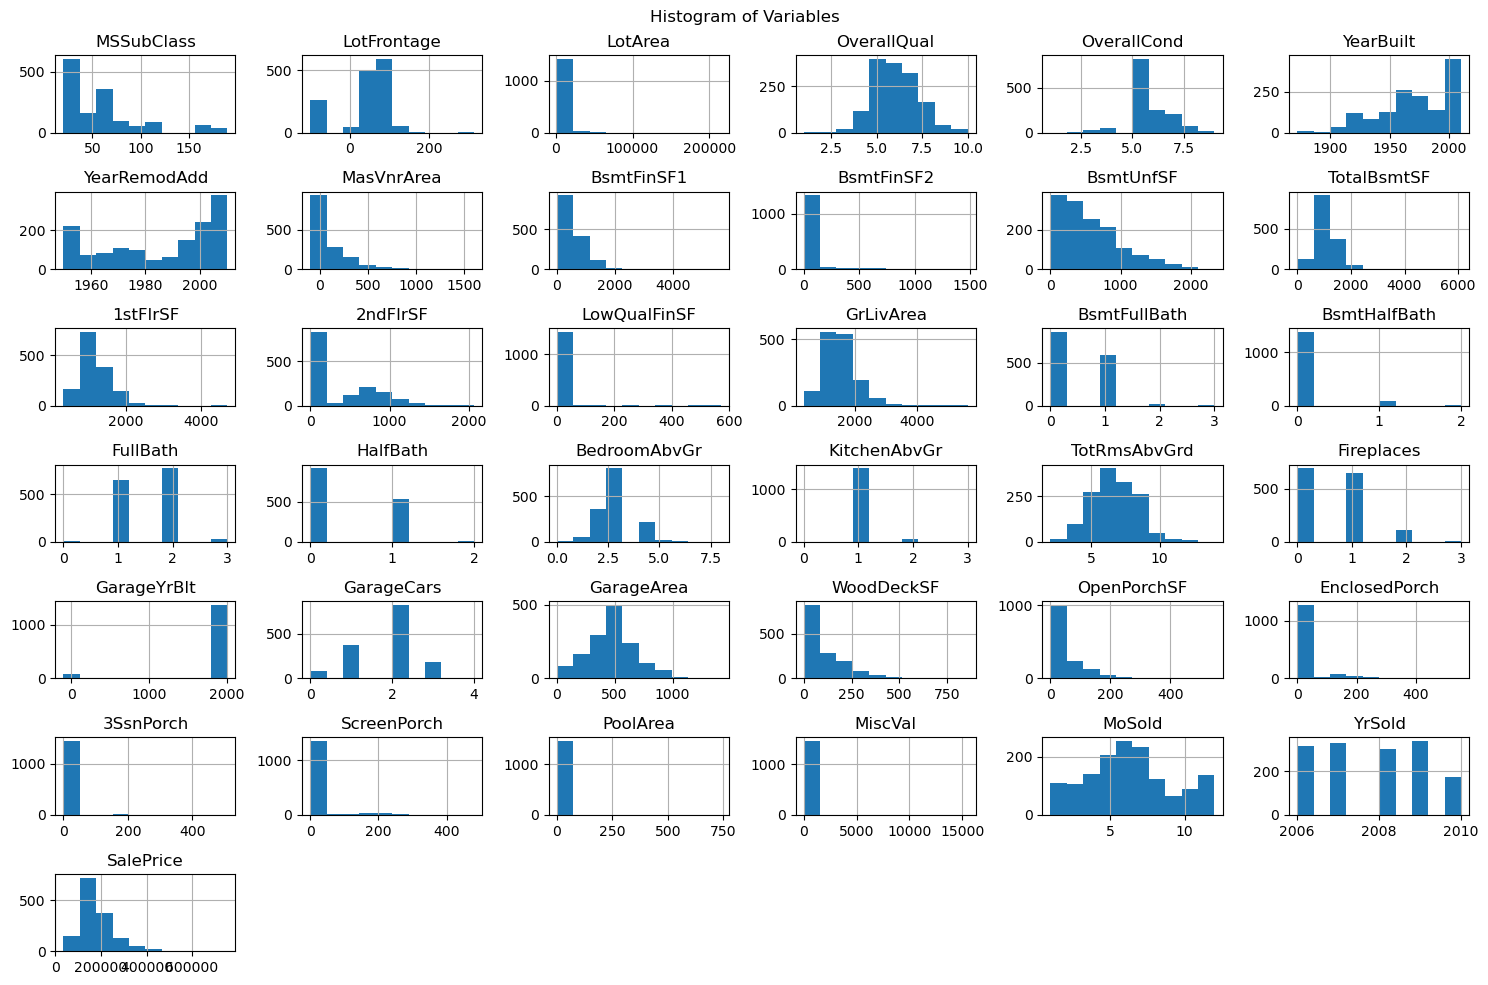

In [11]:
train.hist(figsize=(15, 10))
plt.suptitle('Histogram of Variables')
plt.tight_layout()
plt.show()

Correlation between variables:

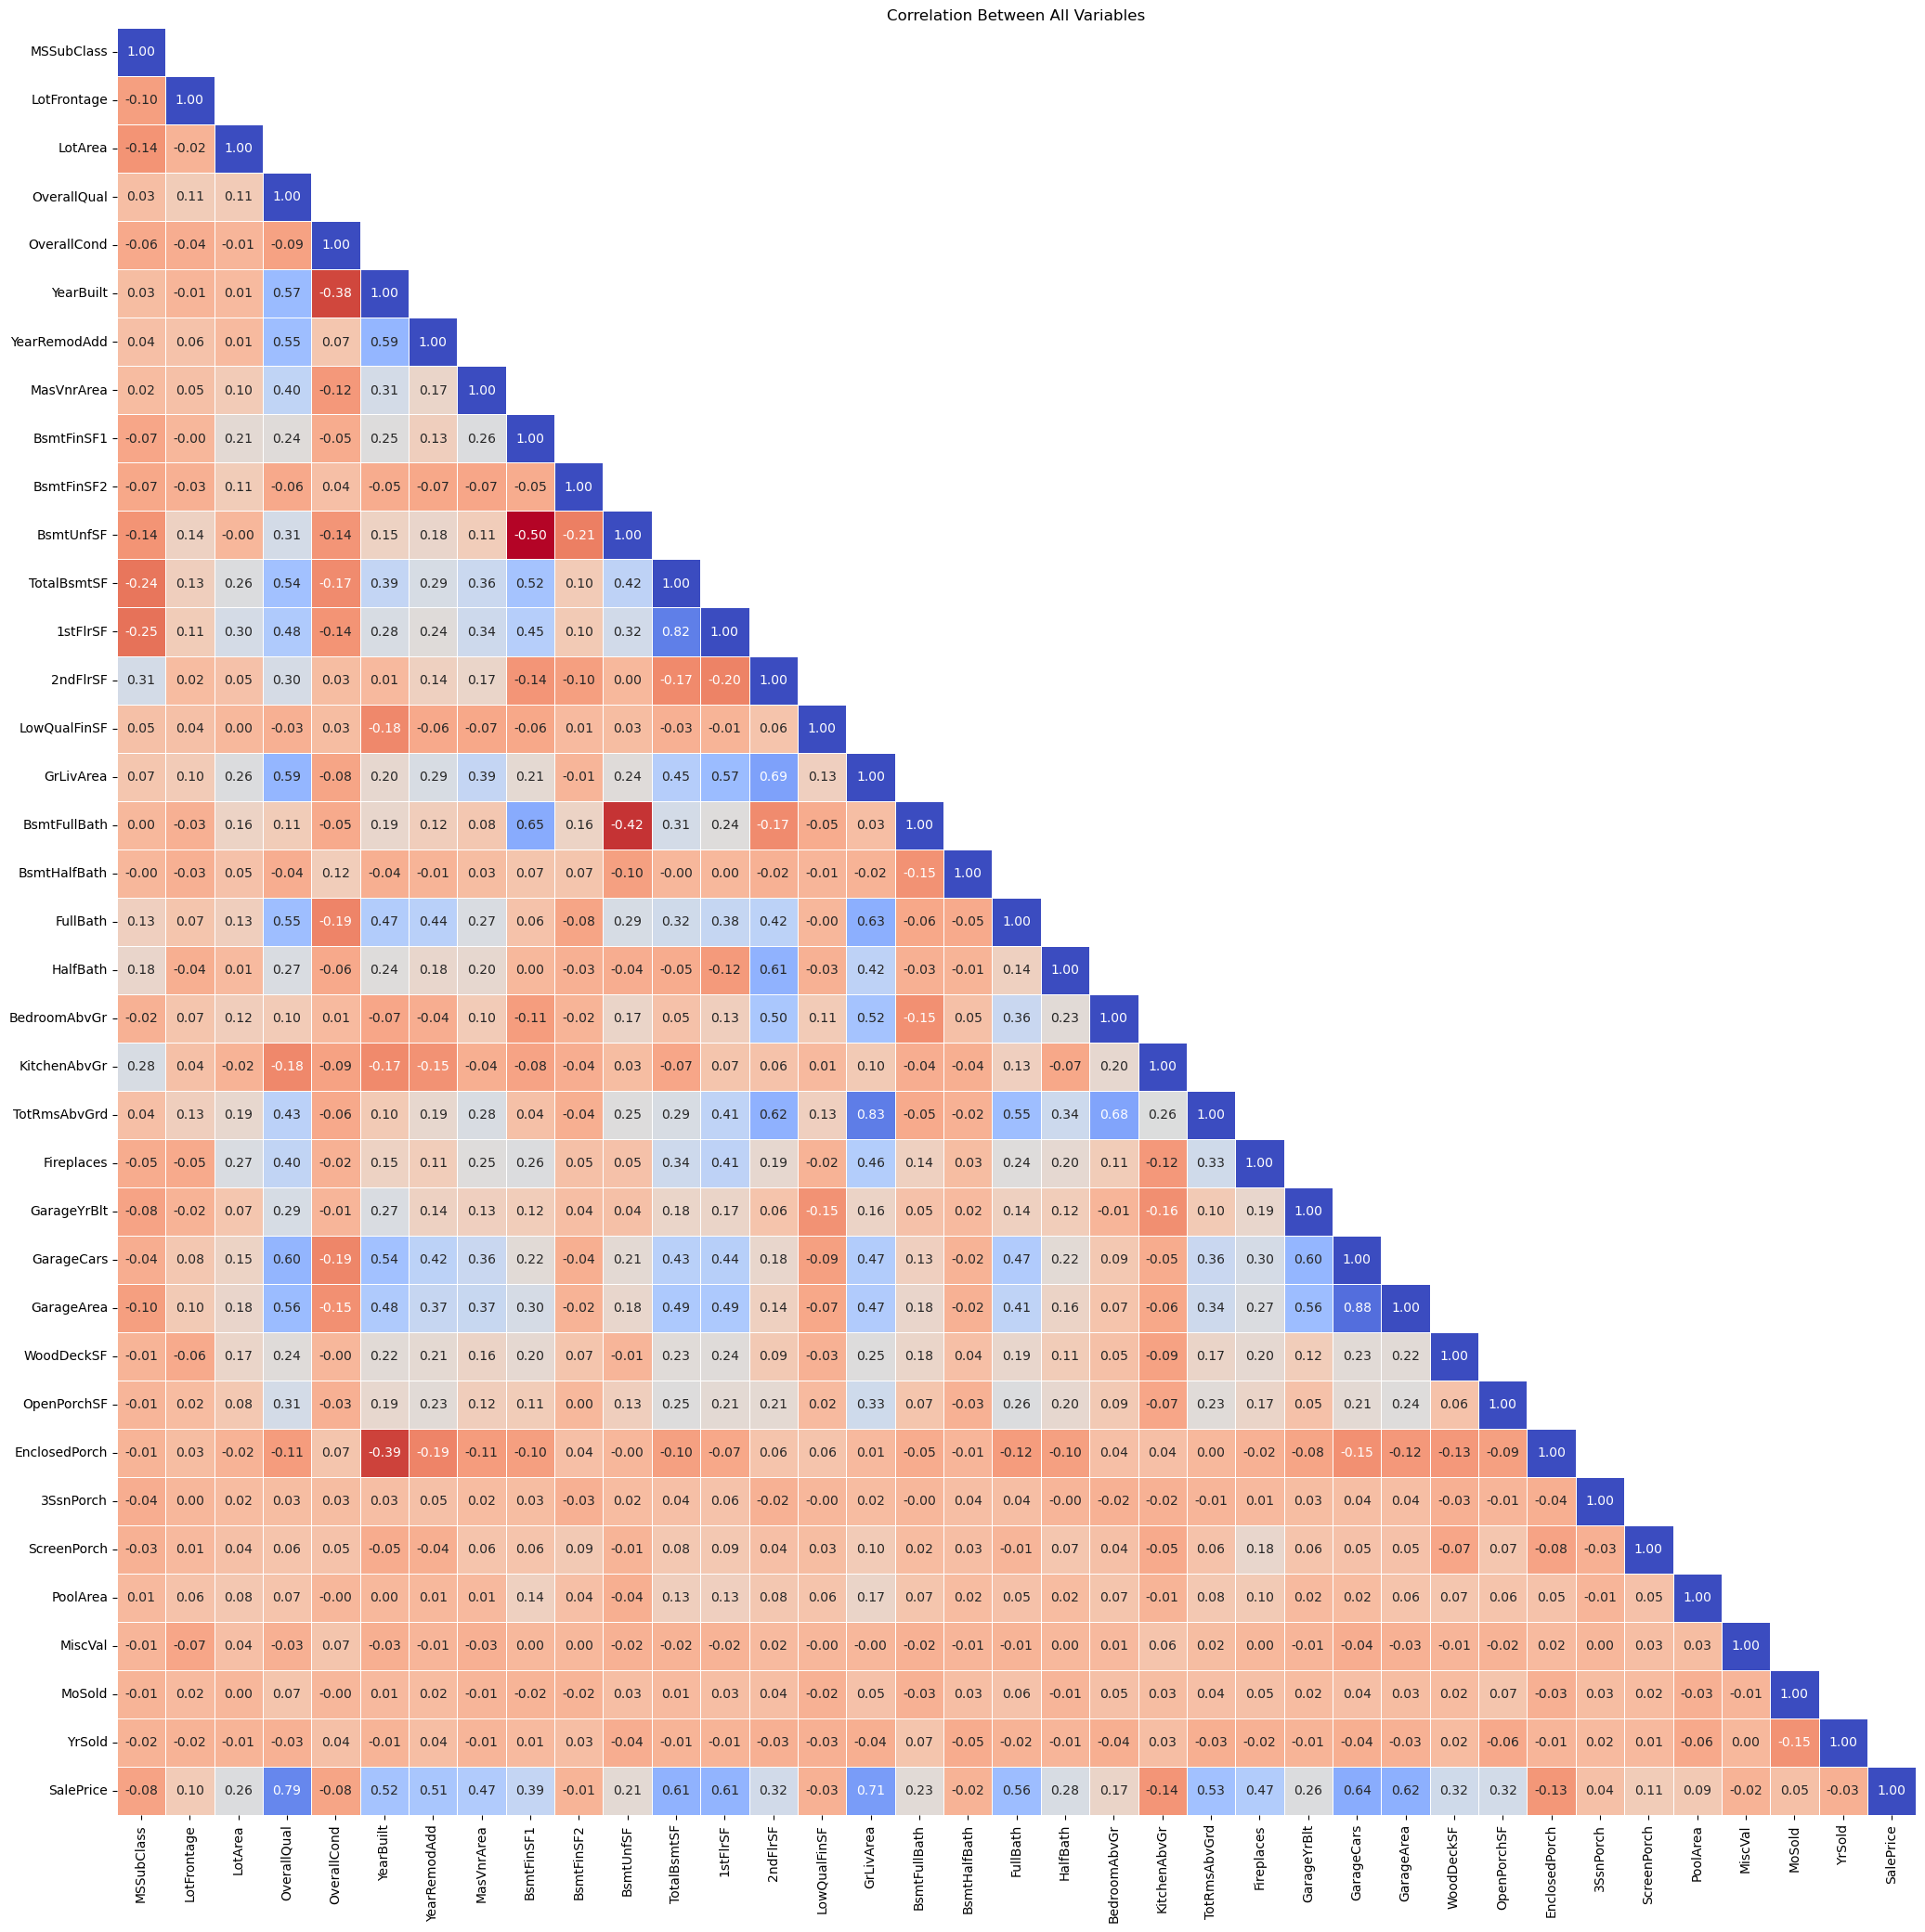

In [14]:
correlation_matrix = train.corr() 

lower_triangle = np.tril(correlation_matrix)
mask = np.where(lower_triangle == 0, True, False)

plt.figure(figsize=(25, 25))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap = sns.color_palette('coolwarm_r', as_cmap=True),
    fmt='.2f',
    linewidths=0.5,
    cbar=False,
    mask=mask
).set_title('Correlation Between All Variables')
plt.show()

More on `SalePrice`:

In [15]:
# Summary statistic of SalePrice
pd.DataFrame(round(train['SalePrice'].describe(), 2))

,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


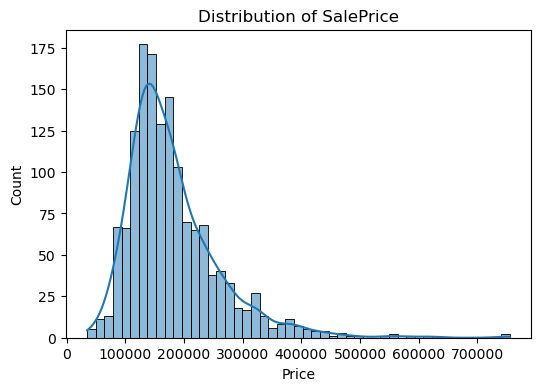

In [22]:
# Detailed histogram for SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(train['SalePrice'], kde=True, edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Price')
plt.grid(False)
plt.show()

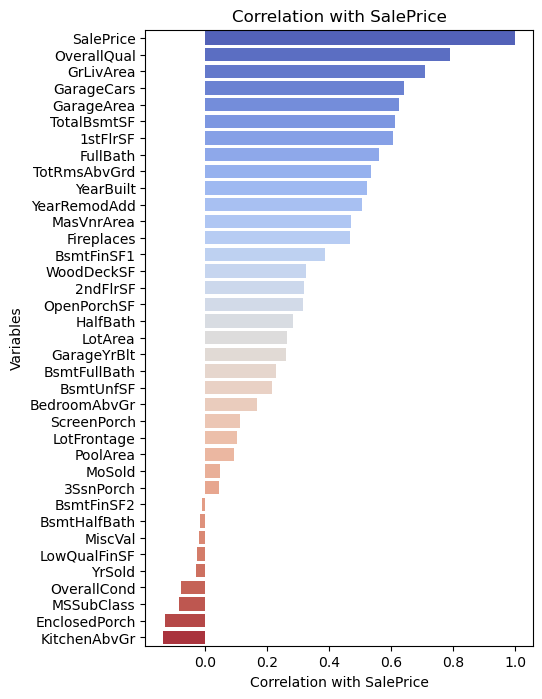

In [17]:
# Correlations with SalePrice
sale_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(5,8))
sns.barplot(
    y=sale_corr.index, 
    x=sale_corr, 
    orient='h',
    palette='coolwarm'
)
plt.title('Correlation with SalePrice')
plt.xlabel('Correlation with SalePrice')
plt.ylabel('Variables')
plt.show()

`OverallQual` seems to be the most impactful variable for predicting `SalePrice`. Running a simple OLS regression can provide us with a good candidate for a baseline. 

In [18]:
# OLS regression 

Y = train['SalePrice']
X = train['OverallQual']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          2.19e-313
Time:                        21:37:17   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

Coefficient of 45,440 means that for every point increase (`OverallQual` is a 10-point scale variable), `SalePrice` value is expected to increase by $45,440.

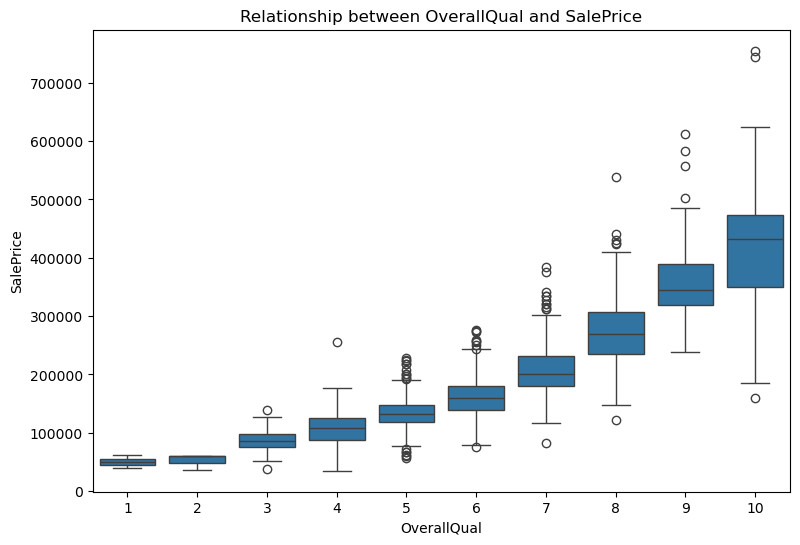

In [22]:
plt.figure(figsize=(9,6))
sns.boxplot(
    x=train['OverallQual'], 
    y=train['SalePrice']
)
plt.title('Relationship between OverallQual and SalePrice')
plt.show()

FOR DISCUSSION: What do we exactly do with this baseline? 

Log transform `SalePrice`:

In [19]:
train['SalePrice_log'] = np.log(train['SalePrice'])

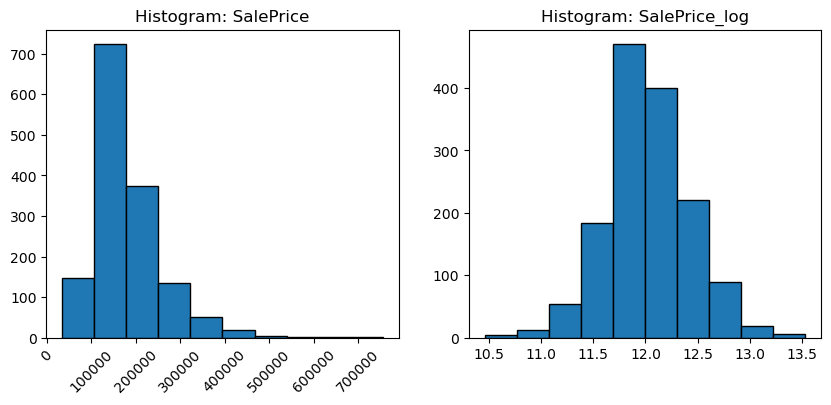

In [33]:
# Compare log vs non log

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(train['SalePrice'], edgecolor='black')
plt.title('Histogram: SalePrice')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(train['SalePrice_log'], edgecolor='black')
plt.title('Histogram: SalePrice_log')

plt.show()

Log transforming the `SalePrice` variable gives us a more normal variable to work with

### Train, Validation, Test

In [ ]:
# Make function for all data cleaning process above
def data_cleaning(dataset):
    pass 

In [59]:
# Run data_cleaning with test dataset

In [61]:
# Set seed
random_state = 0

# Split data
train_val_split_size = 0.2

# Shuffle training data
train_shuffled = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Split shuffled training data into training and validation
X_train, X_val = train_test_split(train_shuffled, test_size=train_val_split_size, random_state=random_state)

# Pop out SalePrice as Y
Y_train = X_train.pop('SalePrice')
Y_val = X_val.pop('SalePrice')

# Shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (1168, 75)
Y_train shape: (1168,)
X_val shape: (292, 75)
Y_val shape: (292,)


In [ ]:
# Prepare test datset

# Run data cleaning
test = data_cleaning(test)

X_test = test

# Read test Y
Y_test = pd.read_csv('../data/sample_submission.csv')

Y_test = Y_test['SalePrice']

print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

---

## Model

- Modeling decisions
- Data transformations/augment/processing
- Modeling 
- Visualizations and analysis

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

---

## Evaluation